In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from datetime import datetime
print("Done")

Done


In [2]:
dp3 = 50*0.2*9.80665
r = 2 * 21.9e-3 / dp3
r

0.0004466357012843326

In [3]:
t_err = 0.1
p_err = 1

In [4]:
h_err = 0.1
data = pd.read_csv("../data/data.csv")
data["y"] = (data.l * 0.2 * 9.80665 - 156.9064) * 0.495 / 2
data["x"] = data.t
data["x_err"] = np.array([0.1] * 9)
data["y_err"] = data.y * (0.5 / data.l + 0.03/0.99)
data

,t,l,y,x,x_err,y_err
0,22.0,230.0,72.814376,22.0,0.1,2.364788
1,25.4,226.0,70.872660,25.4,0.1,2.304454
2,30.4,225.0,70.387230,30.4,0.1,2.289362
3,35.3,225.0,70.387230,35.3,0.1,2.289362
4,40.3,223.5,69.659087,40.3,0.1,2.266718
5,45.2,221.5,68.688228,45.2,0.1,2.236514
6,50.0,220.0,67.960084,50.0,0.1,2.213851
7,55.0,218.0,66.989226,55.0,0.1,2.183622
8,60.0,216.0,66.018368,60.0,0.1,2.153377


(-0.17703313550208102, 0.0023823973755695968)

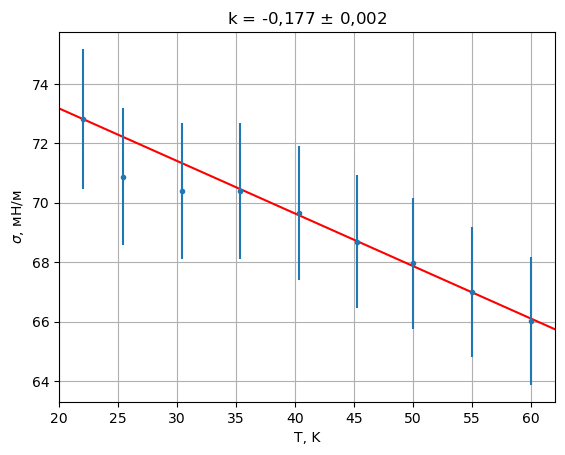

In [5]:
x = list(data.x)
y = list(data.y)
del x[1:3]
del y[1:3]
pp, V = np.polyfit(x, y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.grid()
plt.axline([min(data.x), min(data.x) * k + b], [max(data.x), max(data.x) * k + b], color='r')
plt.errorbar(data.x, data.y, xerr=data.x_err, yerr = data.y_err, fmt='.')
plt.xlabel("T, K")
plt.ylabel("$\\sigma$, мН/м")
plt.title("k = -0,177 $\pm$ 0,002")
plt.savefig("../img/plot1.png", dpi=400)
k, k_err

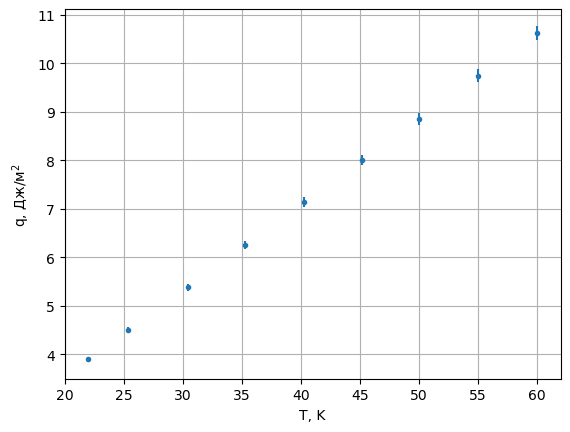

In [6]:
x = data.t
y = -data.t * k
x_err = data.x_err
y_err = -y * k_err / k
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='.')
plt.grid()
plt.xlabel("T, K")
plt.ylabel("q, Дж/м$^2$")
plt.savefig("../img/plot2.png", dpi=400)

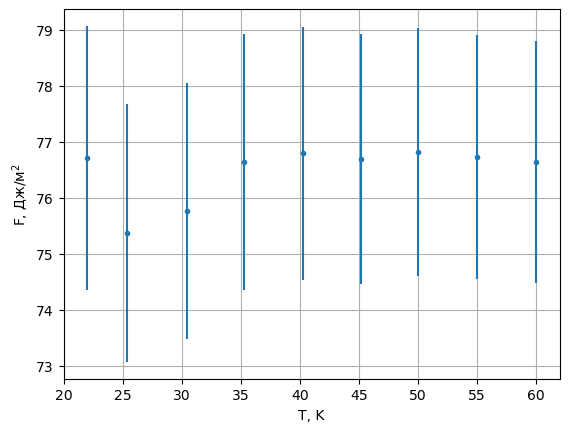

In [7]:
x = data.t
y = data.y-data.t * k
x_err = data.x_err
y_err = data.y_err
y_err = np.hypot(data.t * k_err, data.y_err)
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='.')
plt.grid()
plt.xlabel("T, K")
plt.ylabel("F, Дж/м$^2$")
plt.savefig("../img/plot3.png", dpi=400)

b = 75.60619892219175 +/- 0.5269597316031427 (0.6969795322542934%)
1.0 83.25373753274386


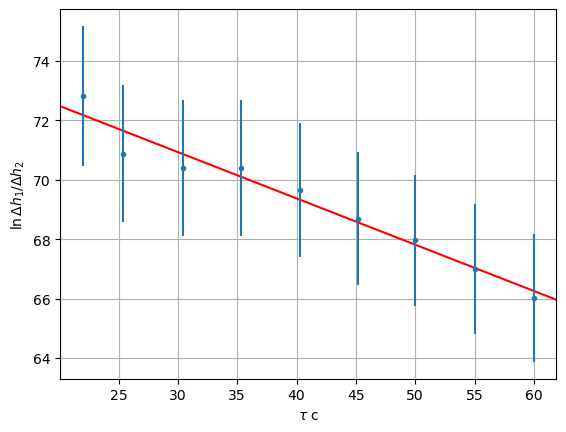

In [8]:
pp, V = np.polyfit(data.x, data.y, 1, cov=True)
k, b = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
plt.grid()
plt.axline([min(data.x), min(data.x) * k + b], [max(data.x), max(data.x) * k + b], color='r')
plt.errorbar(data.x, data.y, yerr = data.y_err, fmt='.')
plt.xlabel("$\\tau$ с")
plt.ylabel("$\\ln\\Delta h_1 / \\Delta h_2$")
print(f"b = {b} +/- {b_err} ({b_err/b*100}%)")
y_err = data.y_err.min()
b_err = np.hypot(b_err, y_err)
g = np.exp(b) / (np.exp(b) - 1)
g_err = np.exp(b + b_err) / (np.exp(b - b_err) - 1) - g
print(g, g_err)
plt.savefig("../img/plot.png", dpi=400)

79.45762498703692
71.7547728573465
7.702852129690427


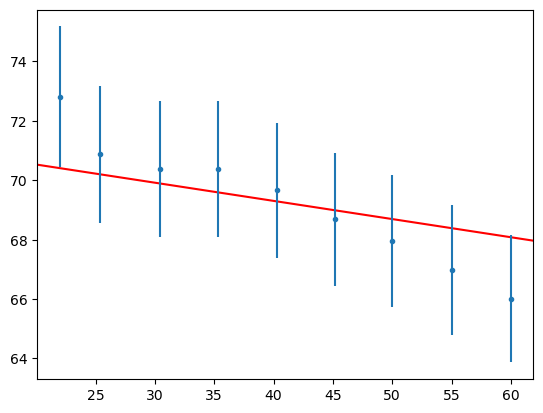

In [9]:
y = list(data.y)
for i in range(0, 3):
    y[i] += data.y_err[i]
for i in range(4, 7):
    y[i] -= data.y_err[i]
pp, V = np.polyfit(data.x, y, 1, cov=True)
k, b1 = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(b1)

y = list(data.y)
for i in range(0, 3):
    y[i] -= data.y_err[i]
for i in range(4, 7):
    y[i] += data.y_err[i]
    
pp, V = np.polyfit(data.x, y, 1, cov=True)
k, b2 = pp
k_err, b_err = np.sqrt(V[0][0]), np.sqrt(V[1][1])
print(b2)

plt.axline([min(data.x), min(data.x) * k + b2], [max(data.x), max(data.x) * k + b2], color='r')
plt.errorbar(data.x, data.y, yerr = data.y_err, fmt='.')

print(b1-b2)

In [16]:
t = list(data.x)
s = list(data.y)
del t[1:3]
del s[1:3]
lol = [(t[i] + s[i] / 0.07 + 273, t[i] + s[i] / 0.29 + 273) for i in range(len(t))]
for i in lol:
    print((i[0] + i[1]) / 2, (i[0] - i[1]) / 2)

940.6447155172411 394.5606594827584
932.4232249999998 381.4086374999999
930.9667778448276 377.46303090517233
927.258181637931 372.20222211206885
925.6017344827586 368.25661551724136
921.9931382758621 362.99580672413794
918.3845420689656 357.7349979310345
